# Intersection

In this notebook we demonstrate how to define a T-shape intersection with AutomotiveDrivingModels.  You will also learn how to define your own custom action type and driver model type.


In [1]:
using AutomotiveDrivingModels

# All the functions related to visualization
using AutoViz

┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\AutomotiveDrivingModels\ZEfHM.ji for AutomotiveDrivingModels [99497e54-f3d6-53d3-a3a9-fa9315a7f1ba]
└ @ Base loading.jl:1184
┌ Info: Precompiling AutoViz [82aa6e0c-a491-5edf-8d4b-c16b98e4ea17]
└ @ Base loading.jl:1186
┌ Warning: Module AutomotiveDrivingModels with build ID 614703232384699 is missing from the cache.
│ This may mean AutomotiveDrivingModels [99497e54-f3d6-53d3-a3a9-fa9315a7f1ba] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling Cairo [159f3aea-2a34-519c-b102-8c37f9878175]
└ @ Base loading.jl:1186
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Cairo [159f3aea-2a34-519c-b102-8c37f9878175]
│   exception = ErrorException("Cache file \"C:\\Users\\Maxime\\.julia\\compiled\\v1.1\\Cairo\\l6vnT.ji\" not found.\n")
└ @ Base loading.jl:969


## Generate a T-Shape intersection

In order to generate the road network, one first initializes a Roadway object.

In [2]:
roadway = Roadway();

In [3]:
# Define coordinates of the entry and exit points to the intersection
r = 5.0 # turn radius
A = VecSE2(0.0,DEFAULT_LANE_WIDTH,-π)
B = VecSE2(0.0,0.0,0.0)
C = VecSE2(r,-r,-π/2)
D = VecSE2(r+DEFAULT_LANE_WIDTH,-r,π/2)
E = VecSE2(2r+DEFAULT_LANE_WIDTH,0,0)
F = VecSE2(2r+DEFAULT_LANE_WIDTH,DEFAULT_LANE_WIDTH,-π)

3-element VecSE2{Float64}:
 13.0              
  3.0              
 -3.141592653589793

The next step consists in appending all the lanes to the road network. We can define a helper function to add a new lane to the roadway.

In [4]:
function append_to_curve!(target::Curve, newstuff::Curve)
    s_end = target[end].s
    for c in newstuff
        push!(target, CurvePt(c.pos, c.s+s_end, c.k, c.kd))
    end
    return target
end

append_to_curve! (generic function with 1 method)

Example of a lane that consists in 3 road segments, a straight curve (from the left to the center), a turning part (right turn) and a final straight curve. You can visualize the lane that has been added to the roadway

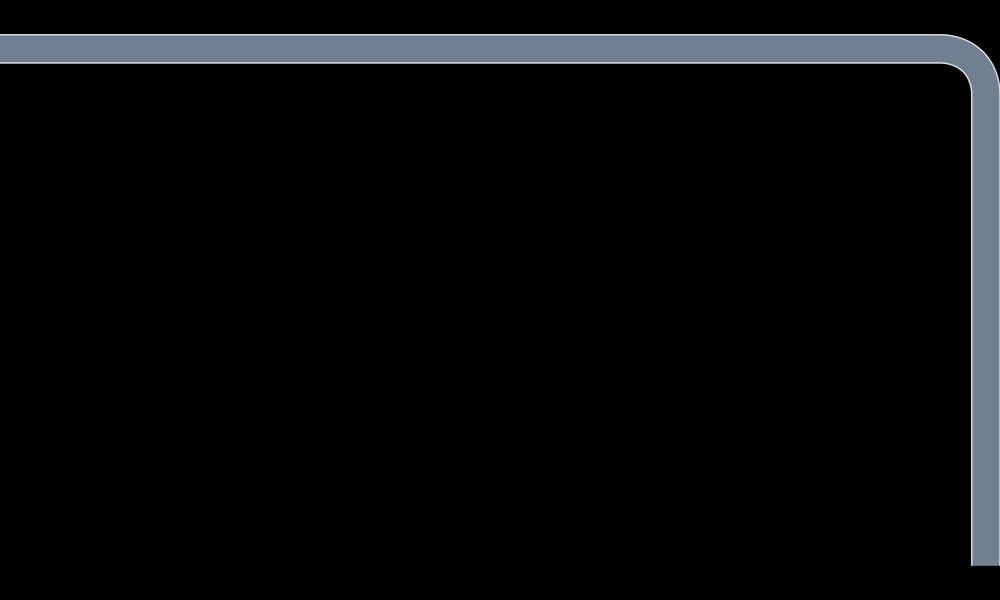

In [5]:
# Append right turn coming from the left
curve = gen_straight_curve(convert(VecE2, B+VecE2(-100,0)), convert(VecE2, B), 2)
append_to_curve!(curve, gen_bezier_curve(B, C, 0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, C), convert(VecE2, C+VecE2(0,-50.0)), 2))
lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

#visualize first lane
cam = FitToContentCamera(0.0)
render(roadway, cam=cam)

Let's repeat the process and complete the T-shape intersection

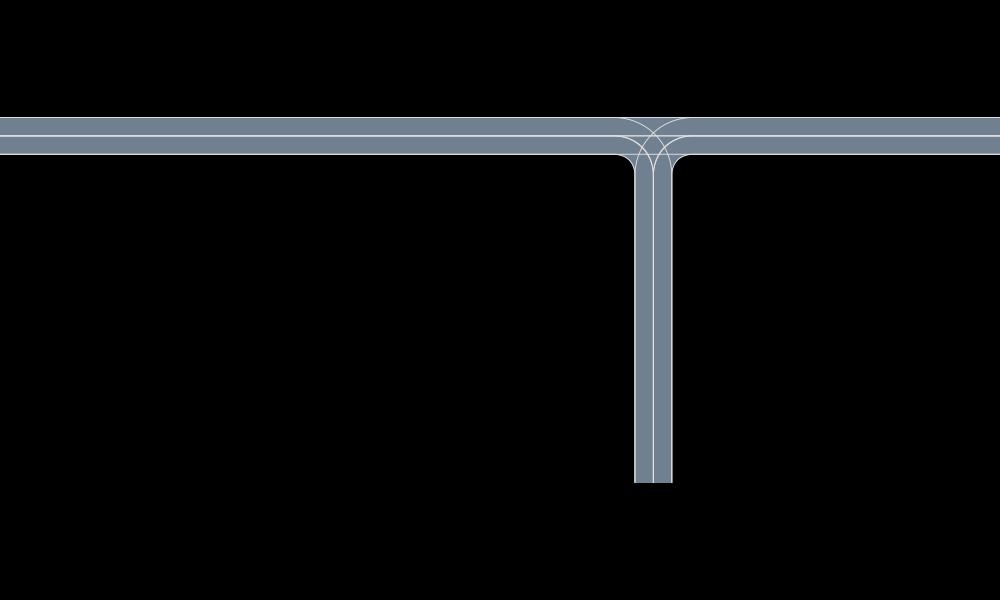

In [6]:
# Append straight left
curve = gen_straight_curve(convert(VecE2, B+VecE2(-100,0)), convert(VecE2, B), 2)
append_to_curve!(curve, gen_straight_curve(convert(VecE2, B), convert(VecE2, E), 2)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, E), convert(VecE2, E+VecE2(50,0)), 2))
lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

# Append straight right
curve = gen_straight_curve(convert(VecE2, F+VecE2(50,0)), convert(VecE2, F), 2)
append_to_curve!(curve, gen_straight_curve(convert(VecE2, F), convert(VecE2, A), 2)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, A), convert(VecE2, A+VecE2(-100,0)), 2))
lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

# Append left turn coming from the right
curve = gen_straight_curve(convert(VecE2, F+VecE2(50,0)), convert(VecE2, F), 2)
append_to_curve!(curve, gen_bezier_curve(F, C, 0.9r, 0.9r, 51)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, C), convert(VecE2, C+VecE2(0,-50)), 2))
lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

# Append right turn coming from below
curve = gen_straight_curve(convert(VecE2, D+VecE2(0,-50)), convert(VecE2, D), 2)
append_to_curve!(curve, gen_bezier_curve(D, E, 0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, E), convert(VecE2, E+VecE2(50,0)), 2))
lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

# Append left turn coming from below
curve = gen_straight_curve(convert(VecE2, D+VecE2(0,-50)), convert(VecE2, D), 2)
append_to_curve!(curve, gen_bezier_curve(D, A, 0.9r, 0.9r, 51)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, A), convert(VecE2, A+VecE2(-100,0)), 2))
lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

cam = FitToContentCamera(0.0)
render(roadway, cam=cam)

We can identify each lane thanks to the following user-defined functions. We define a ```LaneOverlay``` object that indicate the lane to highlight. One could implement any custom type to display other information on the lane. We then add a new method to the  ```render!``` function that execute the specific action (coloring in blue). Look at Autoviz.jl for more detail on the ```render!``` function.

Use the slider to highlight each lane. The number corresponds to a road segment.

**Note :** In order to render the intersection, one must first initialize a ```Scene``` object.

┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1186
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for InteractBase [d3863d7c-f0c8-5437-a7b4-3ae773c01009]
│   exception = Required dependency Knockout [bcebb21b-c2e3-54f8-a781-646b90f6d2cc] failed to load from a cache file.
└ @ Base loading.jl:969


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/468e3c5cbff4bba2f7f3ca28e0afa7cac8df1be0-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/468e3c5cbff4bba2f7f3ca28e0afa7cac8df1be0-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-3a4089d5-9c0b-4915-ad77-f71390a7746e", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>6,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"value: indexString, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"indexString"=>(Observable{String} with 1 listeners. Value:
"3", nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
3, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Maxime\\.julia\\packages\\Knockout\\JE2Yq\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Maxime\\.julia\\packages\\Knockout\\JE2Yq\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\jyXKw\\src\\..\\assets\\all.js", "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\jyXKw\\src\\..\\assets\\style.css", "C:\\Users\\Maxime\\.julia\\packages\\Interact\\Fs3lV\\src\\..\\assets\\bulma_confined.min.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-3a4089d5-9c0b-4915-ad77-f71390a7746e\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"indexString\":WebIO.getval({\"name\":\"indexString\",\"scope\":\"knockout-component-3a4089d5-9c0b-4915-ad77-f71390a7746e\",\"id\":\"ob_03\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knockout-component-3a4089d5-9c0b-4915-ad77-f71390a7746e\",\"id\":\"ob_01\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"formatted_val\"]=ko.computed(    function(){\n        return this.formatted_vals()[parseInt(this.index())-1];\n    }\n,this)]\n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.set
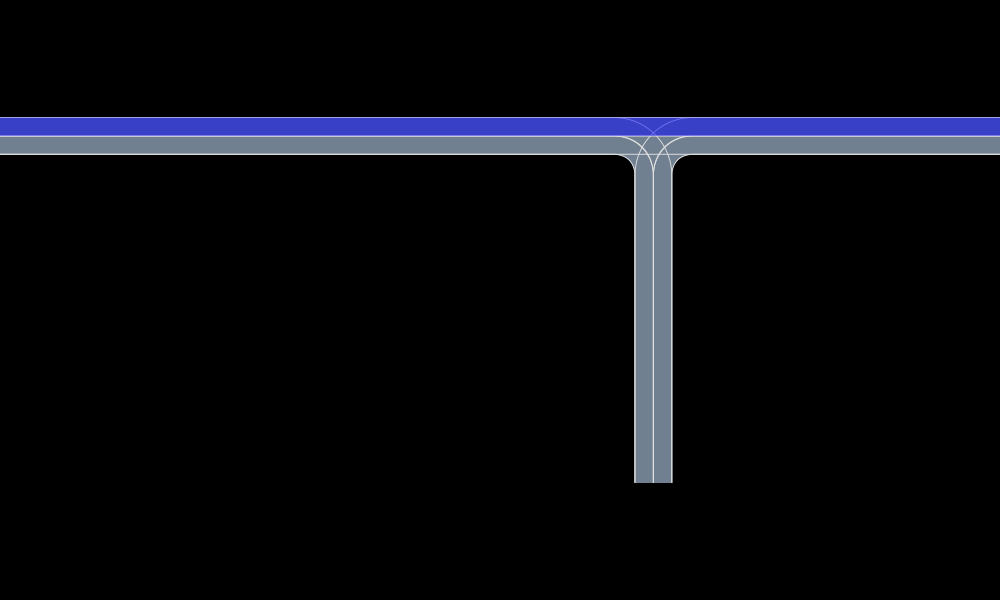
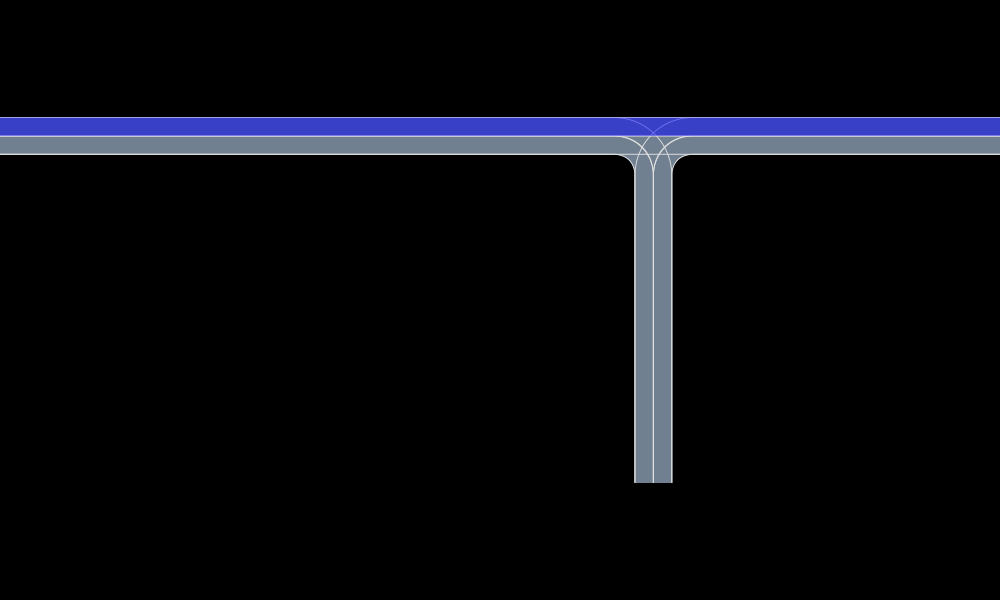

In [7]:
using Interact

scene = Scene()

struct LaneOverlay <: SceneOverlay
    lane::Lane
    color::Colorant
end
function AutoViz.render!(rendermodel::RenderModel, overlay::LaneOverlay, scene::Scene, roadway::Roadway)
    render!(rendermodel, overlay.lane, roadway, color_asphalt=overlay.color)
    return rendermodel
end

@manipulate for i in 1 : length(roadway.segments)
    render(scene, roadway, [LaneOverlay(roadway[LaneTag(i,1)], RGBA(0.0,0.0,1.0,0.5))], cam=cam)
end

## Navigate in the new road network

Let's populate the intersection

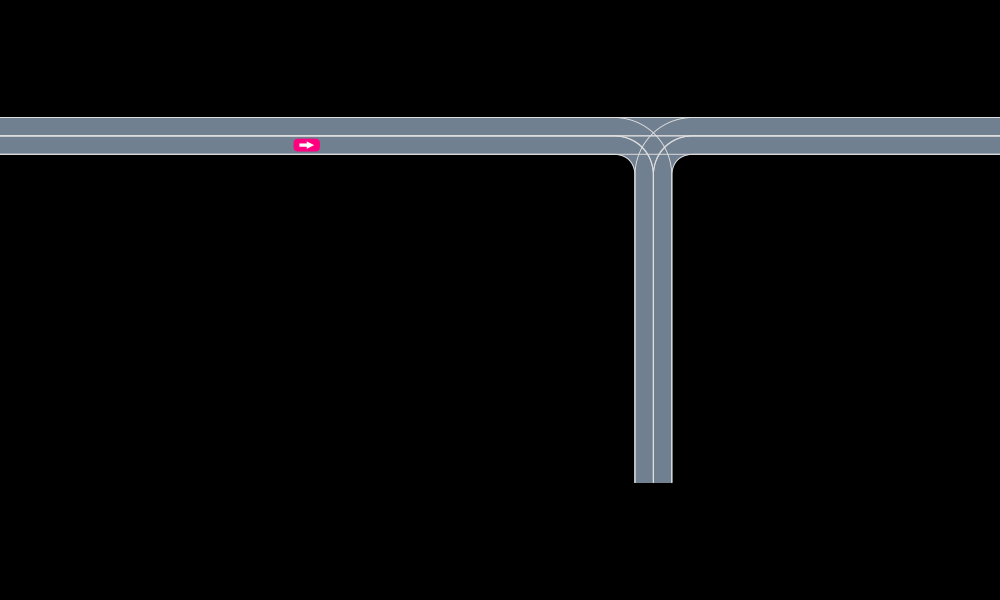

In [8]:
scene = Scene()
vs0 = VehicleState(B + polar(50.0,-π), roadway, 8.0) # initial state of the vehicle
push!(scene, Vehicle(vs0, VehicleDef(), 1)) # add vehicle with the default type

render(scene, roadway, cam=cam)

We will use lateral and longitudinal acceleration to control a car in the intersection. The first step is to define a corresponding action type that will contain the acceleration inputs.


In [9]:
struct LaneSpecificAccelLatLon
    a_lat::Float64
    a_lon::Float64
end

Next, add a method to the propagate function to update the state using our new action type. 


**Note:** There is an existing propagate method to update the state using lateral and longitudinal acceleration. (it is used in line 3)

In [10]:
function AutomotiveDrivingModels.propagate(veh::Vehicle, action::LaneSpecificAccelLatLon, roadway::Roadway, Δt::Float64)
    lane_tag_orig = veh.state.posF.roadind.tag
    state = propagate(veh, LatLonAccel(action.a_lat, action.a_lon), roadway, Δt)
    roadproj = proj(state.posG, roadway[lane_tag_orig], roadway, move_along_curves=false)
    retval = VehicleState(Frenet(roadproj, roadway), roadway, state.v)
    return retval
end

**Driver Model:**

We define a driver model, which can be seen as a distribution over actions. Here we will define the simplest model, which is to repeat the same action.

In [11]:
struct InterDriver <: DriverModel{LaneSpecificAccelLatLon}
    a::LaneSpecificAccelLatLon
end
AutomotiveDrivingModels.get_name(model::InterDriver) = "InterDriver"
Base.rand(model::InterDriver) = model.a

**Simulate: **

First associate a model to each driver in the scene using a dictionnary. Here we only have one driver identified by its ID: 1. Then everything is ready to run the ```simulate!``` function.

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-a265fd17-4aca-4b8f-b86d-9fb1e88c6283", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["frame_index"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>101,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"value: indexString, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"indexString"=>(Observable{String} with 1 listeners. Value:
"51", nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Maxime\\.julia\\packages\\Knockout\\JE2Yq\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Maxime\\.julia\\packages\\Knockout\\JE2Yq\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\jyXKw\\src\\..\\assets\\all.js", "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\jyXKw\\src\\..\\assets\\style.css", "C:\\Users\\Maxime\\.julia\\packages\\Interact\\Fs3lV\\src\\..\\assets\\bulma_confined.min.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"77\",\"78\",\"79\",\"80\",\"81\",\"82\",\"83\",\"84\",\"85\",\"86\",\"87\",\"88\",\"89\",\"90\",\"91\",\"92\",\"93\",\"94\",\"95\",\"96\",\"97\",\"98\",\"99\",\"100\",\"101\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-a265fd17-4aca-4b8f-b86d-9fb1e88c6283\",\"id\":\"ob_09\",\"type\":\"observable\"}),\"indexString\":WebIO.getval({\"name\":\"indexString\",\"scope\":\"knockout-component-a265fd17-4aca-4b8f-b86d-9fb1e88c6283\",\"id\":
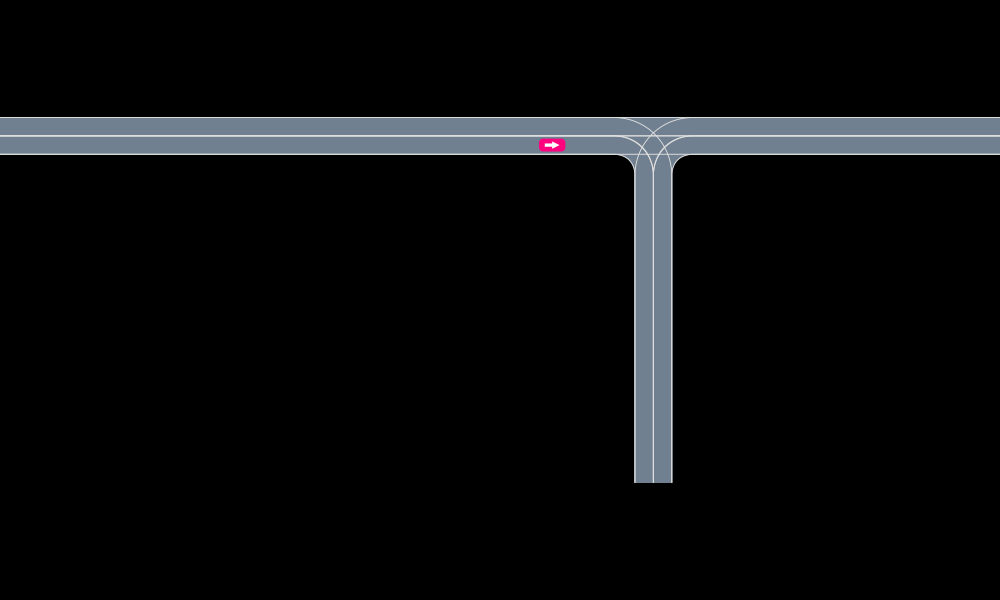
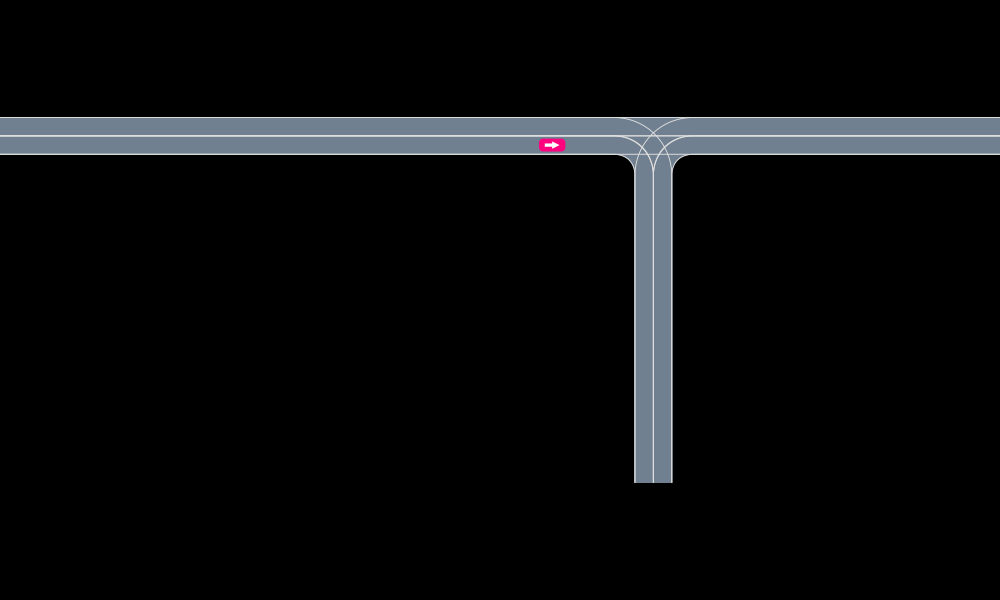

In [12]:
timestep = 0.1

models = Dict{Int, DriverModel}()
# constant speed model
models[1] = InterDriver(LaneSpecificAccelLatLon(0.0,0.0))

nticks = 100
rec = SceneRecord(nticks+1, timestep)
simulate!(rec, scene, roadway, models, nticks)

# interactive visualization
@manipulate for frame_index in 1 : nframes(rec)
    render(rec[frame_index-nframes(rec)], roadway, cam=cam)
end